<a href="https://colab.research.google.com/github/dhanyades/320-Final-Project/blob/main/finalProject_checkpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Checkpoint 2**

---


#**INTRODUCTION**
>Electric vehicles (EVs) have emerged as a key solution to reducing greenhouse gas emissions and achieving a sustainable future in transportation. With global efforts to reduce dependence on fossil fuels, EV adoption has gained significant momentum over the past decade. Our project focuses on exploring sales trends, growth patterns, and market shares of electric vehicles across different regions and categories from 2010 to 2023.

###<u>The dataset provides information on different types of electric vehicles:</u>

>>**BEV (Battery Electric Vehicle)**: Fully electric vehicles powered only by batteries with no internal combustion engine.

>>**PHEV (Plug-in Hybrid Electric Vehicle)**: Vehicles that combine a battery-powered electric motor with a traditional fuel engine, offering both electric-only and hybrid driving modes.

>>**FCEV (Plug-in Hybrid Electric Vehicle)**: Fully electric vehicles powered only by a hydrogen fuel cell refilled at specialized stations.

>>**EV (Electric Vehicle)**: A general term encompassing both BEVs and PHEVs.

###<u>The dataset includes multiple metrics related to electric vehicles:</u>

>>**EV sales (number of vehicles)**: The total count of electric vehicles sold within a region and year.

>>**EV stock share (percentage)**: The proportion of electric vehicles within the overall vehicle fleet, indicating market penetration of EVs in the total stock.

>>**EV sales share (percentage)**: The share of electric vehicles sold as a percentage of all vehicle sales, reflecting how popular EVs are among new car buyers.

###<u>Relevance</u>
>This dataset is relevant for companies in the automotive sector, policymakers designing green transportation strategies, and consumers interested in EV market trends. Understanding sales growth, regional adoption patterns, and market share helps stakeholders assess progress toward sustainable mobility.


###<u>Goal</u>
>Our project focuses on exploring EV sales over time and across regions. By visualizing this data and applying machine learning, we aim to uncover insights into how the EV market has evolved, regional disparities, and potential future adoption patterns. Ultimately, this work highlights progress toward environmentally friendly transportation and informs decisions that support further EV adoption.


#**DATA COLLECTION**
For this project, we utilized the Electric Car Sales 2010–2023 dataset published by Jain, A. (2024) on Kaggle. The dataset is publicly accessible and can be found at:

📊 Dataset Link: https://www.kaggle.com/datasets/jainaru/electric-car-sales-2010-2024

This dataset provides a global overview of electric vehicle (EV) sales, market share, and stock growth from 2010 to 2023. It contains information for multiple regions, vehicle categories, and powertrain types.

The datset includes following columns
1. region: Geographical area where the data was collected (e.g., Australia, Germany).

2. category: Nature of the data, either **Historical**(actuals) or **Projection**(future estimates).

3. parameter: Type of metric (e.g., EV sales, EV stock share, EV sales share)

4. mode: Mode of transport, mainly focusing on **Cars**

5. powertrain: Type of electric vehicle: **BEV** (Battery Electric Vehicle), **PHEV** (Plug-in Hybrid EV), or **EV** (general electric vehicle).

6. year: Year of the observation (e.g., 2011, 2015, etc.).

7. unit: Unit of measurement: **Vehicles** (count) or **percent** (share)

8. value: Actual recorded value for that observation

The dataset offers both raw EV sales numbers and market share percentages, allowing for a comprehensive analysis of electric vehicle adoption trends.

We selected this dataset for its detailed structure, broad geographic coverage, and relevance to understanding the global transition toward electric transportation.

  







#**DATA PROCESSING**

The first step in our data processing pipeline involved loading the dataset into our environment using pandas. We used the .read_csv() function to import the dataset from the project directory:



We imported the dataset using **pandas**


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
df = pd.read_csv("sales_historical_cars.csv")



This loaded the raw dataset, which contains sales, stock share, and sales share information for electric vehicles across different regions from 2010 to 2023.

#**DATA CLEANING**

After collecting the dataset, we performed several processing steps to filter and prepare the data for analysis. Our project focuses specifically on electric vehicle sales across different regions, so we refined the dataset as follows:

We filtered the dataset to keep only rows where the parameter is "EV sales", as our focus is on actual electric vehicle sales rather than stock share or sales share percentages.

>First, the following regions were excluded:
"World", "Europe", "EU27", "Rest of the world"

>Second, we dropped unnecessary columns that are not relevant to our specific analysis:
>>category: describes whether the data is historical or projected (all our selected data is historical).

>>mode — mode of transport (our dataset only includes cars).

>>unit — unit of measurement, which is consistent for sales (vehicles)

After these processing steps, we obtained a cleaned dataset containing only electric vehicle sales by region, year, and powertrain type (BEV, PHEV, EV). This processed data is ready for visualization and further analysis to explore trends in EV adoption worldwide.

The cleaned dataset has 1189 rows and 5 columns, with 48 unique countries.



In [14]:
sales_df = df[df['parameter'] == 'EV sales']
sales_df = sales_df[sales_df['region'] != 'World']
sales_df = sales_df[sales_df['region'] != 'Europe']
sales_df = sales_df[sales_df['region'] != 'EU27']
sales_df = sales_df[sales_df['region'] != 'Rest of the world']
sales_df.drop(columns = ['category', 'mode', 'unit'], inplace = True)
sales_df
#sales_df.shape
#sales_df['region'].nunique()



,region,parameter,powertrain,year,value
0,Australia,EV sales,BEV,2011,49.0
6,Australia,EV sales,PHEV,2012,80.0
9,Australia,EV sales,BEV,2012,170.0
10,Australia,EV sales,BEV,2013,190.0
13,Australia,EV sales,PHEV,2013,100.0
...,...,...,...,...,...
3629,USA,EV sales,FCEV,2022,2700.0
3630,USA,EV sales,BEV,2022,800000.0
3635,USA,EV sales,BEV,2023,1100000.0
3636,USA,EV sales,FCEV,2023,3000.0


# **Investigating Representation of Countries in EV Sales and Growth Rates in Sales**


---



While invesitagting the EV sales in each country from 2010 to 2023, we assumed that the highest total sales for those years would come from the countries with the highest GDP's. To test this hypothesis, we performed a two-sample t-test comparing the total sales from 2010 to 2023 for the 5 countries with the highest GDP's: USA, China, Germany, India, and Japan to the total sales from the other countries. By seeing if the difference between these two samples was significant, we could check to see if our assumption was correct.

After analyzing total EV sales, we looked at the growth rate in sales from 2010 to 2023. Using the calculated rate, we predicted the total EV in 2023 for each country in the dataset, based on data from the previous year. Our hypothesis is that the there is no significant difference between the predicted and actual EV sales values in 2023. This assumes that, on average, the countries have relatively consistent, compouding growth rates .

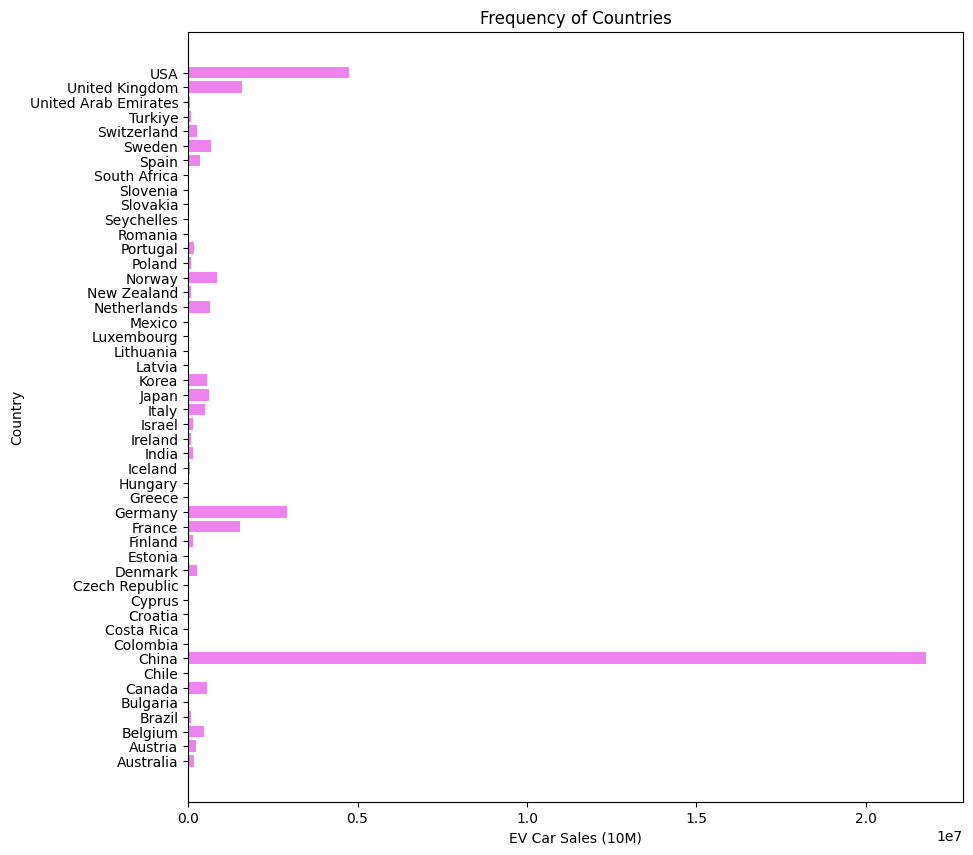

T-statistic: 1.4453343432604875
P-value: 0.11092828761768918


<Figure size 1000x1000 with 0 Axes>

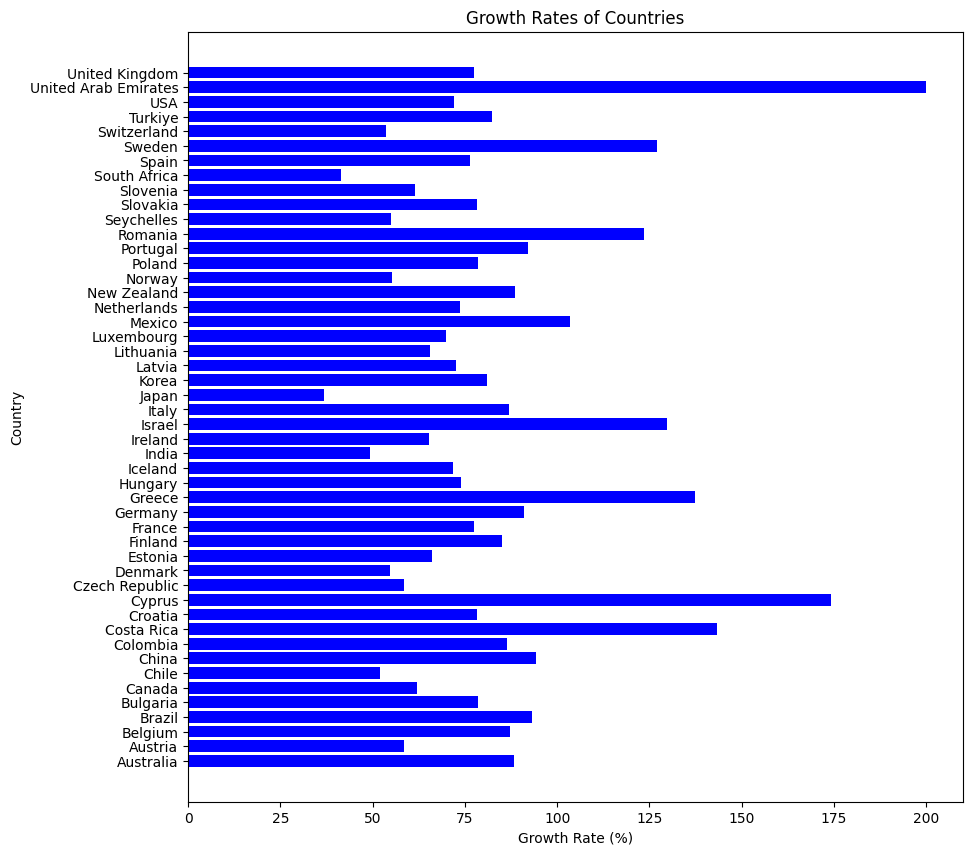

T-statistic: 1.9280651988260713
P-value: 0.029711834062448404


In [15]:
# summing ev sales over time for each country
counts = []
for country in sales_df['region'].unique():
  counts.append(sales_df[sales_df['region'] == country]['value'].sum())
# plotting ev sales against country
plt.figure(figsize=(10, 10))
plt.barh(sales_df['region'].unique(), counts, color = 'violet')
plt.title('Frequency of Countries')
plt.xlabel('EV Car Sales (10M)')
plt.ylabel('Country')
plt.show()
# summing ev sales for top 5 GDP countries
topgppcountries = ["USA", "China", "Germany", "India", "Japan"]
topgdpcounts = []
for country in topgppcountries:
  topgdpcounts.append(sales_df[sales_df['region'] == country]['value'].sum())
# summing ev sales for other countries
othercounts = []
for country in sales_df['region'].unique():
  if country not in topgppcountries:
    othercounts.append(sales_df[sales_df['region'] == country]['value'].sum())
# finding out if difference is significant by performing two sample T-test
# no reason to assume variances are equal, so Welch's test
t_stat, p_value = ttest_ind(topgdpcounts, othercounts, equal_var=False, alternative='greater')
print("T-statistic:", t_stat)
print("P-value:", p_value)
plt.figure(figsize=(10, 10))
grouped = sales_df.groupby(['region', 'year'], as_index=False)['value'].sum()
grouped = grouped.sort_values(by = ['region', 'year'])
yeardiff = grouped.groupby('region')['year'].max() - grouped.groupby('region')['year'].min()
first_val = grouped.groupby('region')['value'].first()
last_val = grouped.groupby('region')['value'].last()
growth_rates = (last_val / first_val)**(1 / yeardiff) - 1
plt.figure(figsize=(10, 10))
plt.barh(growth_rates.index, growth_rates.values*100, color = 'blue')
plt.title('Growth Rates of Countries')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Country')
plt.show()
# predict sales in 2023
predicted_sales = []
for country in sales_df['region'].unique():
  predicted_sales.append(growth_rates[country] * sales_df[(sales_df['region'] == country) & (sales_df['year'] == 2022)]['value'].sum() + sales_df[(sales_df['region'] == country) & (sales_df['year'] == 2022)]['value'].sum())
# actual sales in 2023
actual_sales = []
for country in topgppcountries:
  actual_sales.append(sales_df[(sales_df['region'] == country) & (sales_df['year'] == 2023)]['value'].sum())
# finding out if difference is significant
# we can assume equal variance since data is spread approximately the same
t_stat2, p_value2 = ttest_ind(actual_sales, predicted_sales, equal_var=True, alternative='greater')
print("T-statistic:", t_stat2)
print("P-value:", p_value2)

In [16]:
import plotly.express as px

growth_rates_df = growth_rates.reset_index()
growth_rates_df.columns = ['region', 'growth_rate']

iso_mapping = {
    'Australia': 'AUS', 'Austria': 'AUT', 'Belgium': 'BEL', 'Brazil': 'BRA', 'Bulgaria': 'BGR',
    'Canada': 'CAN', 'Chile': 'CHL', 'China': 'CHN', 'Colombia': 'COL', 'Costa Rica': 'CRI',
    'Croatia': 'HRV', 'Cyprus': 'CYP', 'Czech Republic': 'CZE', 'Denmark': 'DNK', 'Estonia': 'EST',
    'Finland': 'FIN', 'France': 'FRA', 'Germany': 'DEU', 'Greece': 'GRC', 'Hungary': 'HUN',
    'Iceland': 'ISL', 'India': 'IND', 'Ireland': 'IRL', 'Israel': 'ISR', 'Italy': 'ITA',
    'Japan': 'JPN', 'Korea': 'KOR', 'Latvia': 'LVA', 'Lithuania': 'LTU', 'Luxembourg': 'LUX',
    'Mexico': 'MEX', 'Netherlands': 'NLD', 'New Zealand': 'NZL', 'Norway': 'NOR', 'Poland': 'POL',
    'Portugal': 'PRT', 'Romania': 'ROU', 'Seychelles': 'SYC', 'Slovakia': 'SVK', 'Slovenia': 'SVN',
    'South Africa': 'ZAF', 'Spain': 'ESP', 'Sweden': 'SWE', 'Switzerland': 'CHE', 'Turkiye': 'TUR',
    'USA': 'USA', 'United Arab Emirates': 'ARE', 'United Kingdom': 'GBR'
}

growth_rates_df['iso_alpha'] = growth_rates_df['region'].map(iso_mapping)
mapped_df = growth_rates_df.dropna(subset=['iso_alpha']).copy()

fig = px.choropleth(
    mapped_df,
    locations = 'iso_alpha',
    color = 'growth_rate',
    hover_name = 'region',
    color_continuous_scale = [(0.0, 'blue'), (1.0, 'red')],
    range_color = [mapped_df['growth_rate'].min(), mapped_df['growth_rate'].max()],
    title = 'Growth Rate of Car Sales by Country on World Map (Blue=Low, Red=High)',
    labels = {'growth_rate': 'growth_rate'}
)

fig.update_layout(
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection_type = 'natural earth',
        bgcolor = 'white'
    ),
    title_x = 0.5,
    width = 1200,
    height = 700
)

fig.update_coloraxes(
    colorbar_title = "Growth Rate",
)

fig.show()


As expected, the country with one of the highest populations, China, has the highest number of car sales. Surprisingly, India with the actual largest population has some of the lowest sales. Overall, East Asian and European countries lead in EV sales, in addition to the U.S. and Australia.

The two-sample t-test comparing the total EV sales from 2010 to 2023 in the top 5 countries with the highest GDPs to the rest of the countries' sales in those years yielded a t-statistic value of 1.45 and a p-value of 0.11. The p-value is greater that 0.05 and the t-statistic value is relatively small, so the null hypothesis is accepted. Thus, our assumption was incorrect and there is no significant different between the total sales for top GDP countries and other countries. Looking at the first bar graph, it can be observed that China is an outlier and has high sales, but other high GDP countries do not have much more sales than other countries.

Two countries in Middle East lead in EV sale growth rate: UAE and Cyprus. Both of these countries reported very low sales in their first few years and then nearly tripled by the end. While the final sales are still low, negligible in the first graph, sales in these countries are growing very quickly.

The t-test comparison between the predicted sales for 2023 and the actual sales yielded a t-statistic value of 1.93 and a p-value of 0.03. Since the p-value is less than 0.05, the groups are statistically different. Thus, our assumption was incorrect, and the countries do not have a consistent growth rate over the years. This rate is further analyzed in the third section analyzing EV sales growth rates for the top 10 GDP countries.

# **Comparing Sales Growth of Recorded EV Types**

---



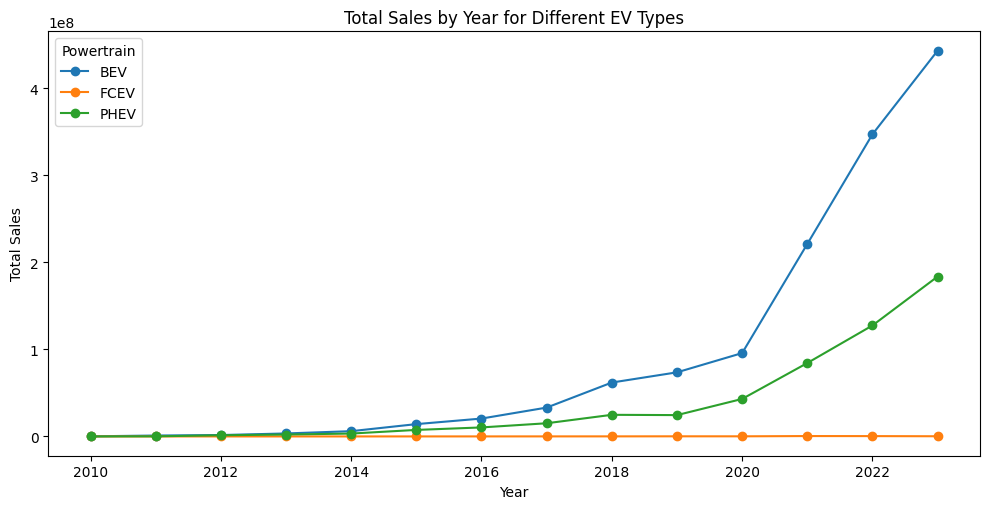

In [17]:
powertrain_df = sales_df.copy()
powertrain_df_total = powertrain_df.groupby(['powertrain', 'year'])['value'].sum().reset_index()
powertrain_df_total.rename(columns={'value': 'total_sales'}, inplace = True)
powertrain_df = powertrain_df.merge(powertrain_df_total, on = ['powertrain', 'year'])
powertrain_df.drop(columns = ['value', 'region'], inplace = True)
powertrain_df.drop_duplicates()

grouped_EV_type = powertrain_df.groupby(['year', 'powertrain'], as_index = False)['total_sales'].sum()

plt.figure(figsize=(10, 5.2))

for powertrain in grouped_EV_type['powertrain'].unique():
    powertrain_data = grouped_EV_type[grouped_EV_type['powertrain'] == powertrain]
    plt.plot(powertrain_data['year'], powertrain_data['total_sales'], marker = 'o', label = powertrain)

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year for Different EV Types')
plt.legend(title = 'Powertrain')
plt.tight_layout()
plt.show()

The reorganized data table for this graph considers the total number of sales for each EV type on a yearly basis, summing all sales of the same EV type from the recorded countries in the dataset.

BEV (Battery Electric Vehicles) cars have the most sales by a wide margin, with PHEV (Plug-in Hybrid Electric Vehicles) as the second most popular. FCEV (Fuel Cell Electric Vehicles) are far less popular, but still have an upward trend in sales towards more recent years.

# *Correlation of EV Type Sales Growth*

While the format of our cleaned sales_df dataset does not show the correlation between the sales growth of different EV types, reorganizing the dataframe allows us to see how these sales are correlated through a correlation matrix.

We can assume the null hypothesis to be the assumption that there is a strong positive correlation between all EV types, as an increase in EV sales in general may increase sales for all types of EVs, presumably as a similar rate.

Thus, our alternative hypothesis is that the sales of at least one pair of EV types do not have a strong poitive correlation, and that our assumed trend of EV sales types is incorrect.

In [7]:
type_cor_df = sales_df.copy()
type_cor_result = type_cor_df.pivot_table(
    index=['region', 'year'],
    columns='powertrain',
    values='value',
    fill_value = 0
).reset_index()
type_cor_result = type_cor_result[['region', 'BEV', 'PHEV', 'FCEV', 'year']]

correlation_matrix = type_cor_result[['BEV', 'PHEV', 'FCEV']].corr()
correlation_matrix

powertrain,BEV,PHEV,FCEV
powertrain,,,
BEV,1.000000,0.957534,0.098457
PHEV,0.957534,1.000000,0.078035
FCEV,0.098457,0.078035,1.000000


There appears to be a strong correlation between BEV and PHEV type sales worldwide. BEV and FCEV have a minimal positive correlation, with PHEV and FCEV having practically no positive correlation. As a result, our alternative hypothesis was proven correct-- not all EV types have a distinct positive correlation.

# **Top 10 GDP Countries 2025 EV Sales from 2010-2023**

To better understand global EV adoption, we analyzed electric vehicle sales across the top 10 GDP countries from 2010 to 2025. This visualization highlights how EV uptake has varied among these economic powerhouses and reveals trends in growth over the past decade.

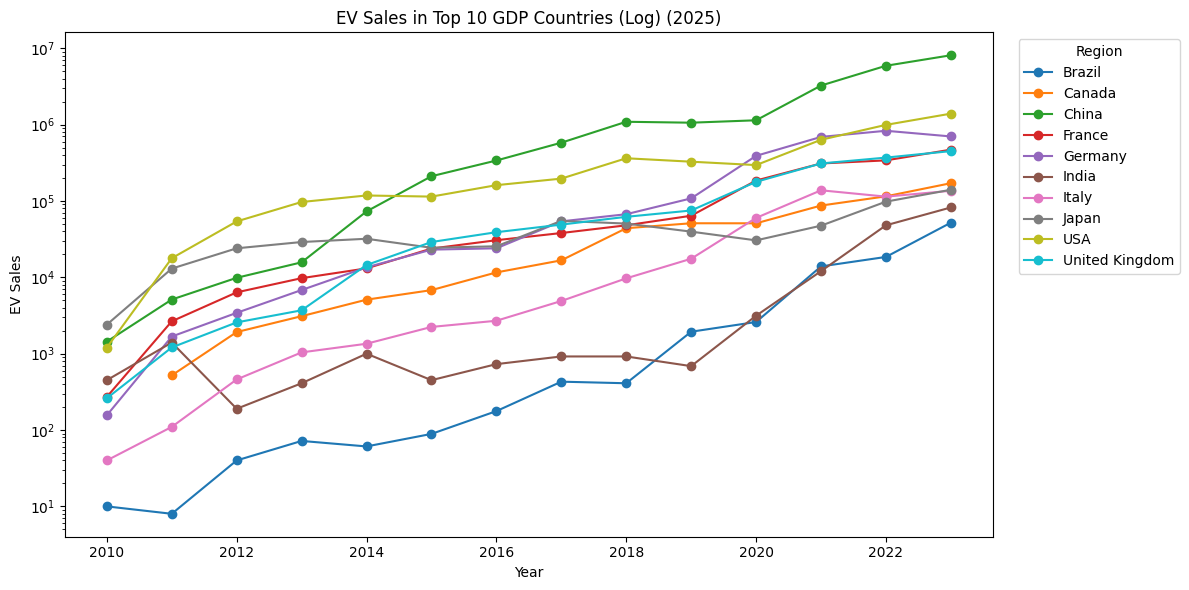

In [8]:
top10_gdp = [
    'USA', 'China', 'Germany', 'India', 'Japan',
    'United Kingdom', 'France', 'Italy', 'Canada', 'Brazil'
]

import matplotlib.pyplot as plt

ev_df = sales_df.copy()
ev_df = ev_df[ev_df['region'].isin(top10_gdp)]

grouped = ev_df.groupby(['region', 'year'], as_index=False)['value'].sum()
ev_agg = grouped.rename(columns={'value': 'ev_sales'})

ev_pivot = ev_agg.pivot(index='year', columns='region', values='ev_sales').fillna(0)

plt.figure(figsize=(12, 6))

for region in ev_agg['region'].unique():
    region_data = ev_agg[ev_agg['region'] == region]
    plt.plot(
        region_data['year'],
        region_data['ev_sales'],
        marker='o',
        label=region
    )

plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('EV Sales in Top 10 GDP Countries (Log) (2025)')
plt.yscale('log')
plt.legend(title='Region', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

The log-scale graph shows EV sales from 2010 to 2023 in the top 10 GDP countries and helps highlight differences in how quickly each country’s EV market has grown. Using a logarithmic scale makes it easier to see trends in countries with lower overall sales, like Brazil, India, and Italy, which usually get compressed in regular line graphs. While China’s massive spike in sales after 2019 is still clear, the log scale smooths out the curve a bit, making it easier to spot steady growth in countries like the UK, France, and Canada. Overall, the log graph is a helpful way to compare how quickly each country is growing in EV adoption, rather than just focusing on which ones sold the most.

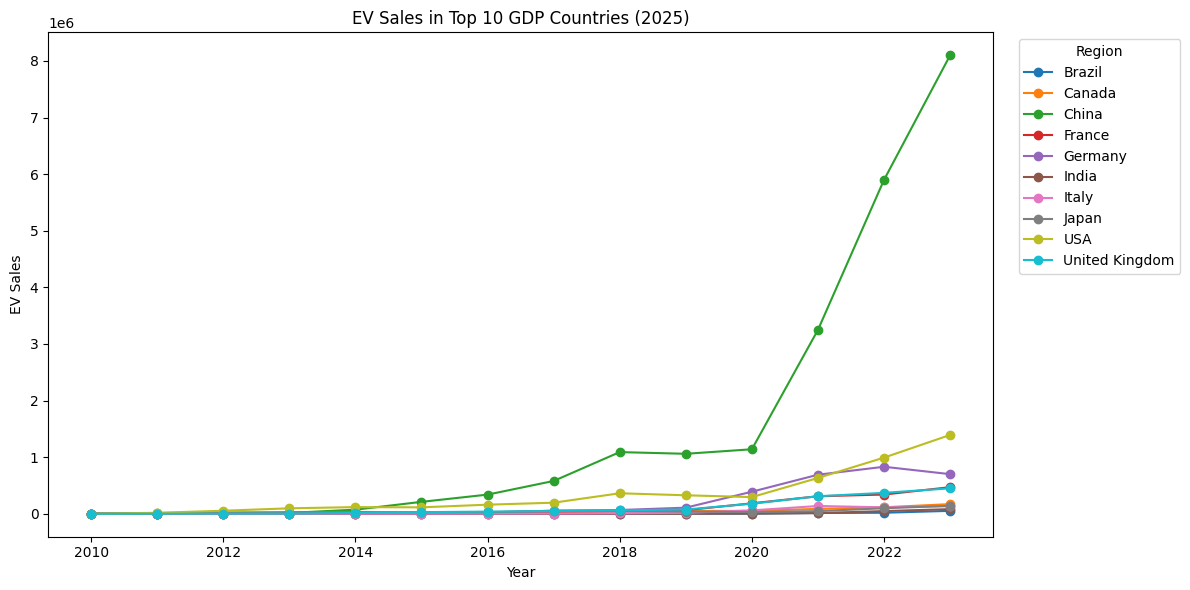

In [9]:
plt.figure(figsize=(12, 6))
for region in ev_agg['region'].unique():
    region_data = ev_agg[ev_agg['region'] == region]
    plt.plot(
        region_data['year'],
        region_data['ev_sales'],
        marker = 'o',
        label = region
    )
plt.xlabel('Year')
plt.ylabel('EV Sales')
plt.title('EV Sales in Top 10 GDP Countries (2025)')
plt.legend(title = 'Region', bbox_to_anchor = (1.02, 1), loc = 'upper left')
plt.tight_layout()
plt.show()

As shown in the graph, China leads by a significant margin, with exponential growth in EV sales beginning around 2020. The United States follows with steady growth, particularly post-2021. European nations such as Germany, France, and the UK show moderate but consistent increases. In contrast, countries like Brazil and India lag behind, reflecting slower adoption or limited infrastructure. This disparity underscores how economic scale doesn't always correlate with EV adoption and highlights the impact of national policy and infrastructure on the EV market.

**Summary of Visuals Top 10 GDP Countries**

Both the linear and logarithmic versions of the EV sales graph offer complementary insights into global adoption patterns among the top 10 GDP countries. The linear graph highlights absolute differences, with China visibly dominating in total EV sales, followed by the USA. However, it compresses the data for countries with lower sales volumes, making it harder to evaluate their trends.

In contrast, the log-scale graph provides a clearer view of relative growth, making it easier to see how nations like India, Brazil, and Italy are gradually scaling their EV markets despite having lower starting points. It helps emphasize that while the gap in absolute numbers remains large, many countries are showing consistent and promising exponential growth. These two graphs paint a fuller picture: one of China's clear leadership in sales, and another of emerging EV markets with a strong rate.

#**Exploring Volatility Calculation and Visualization**

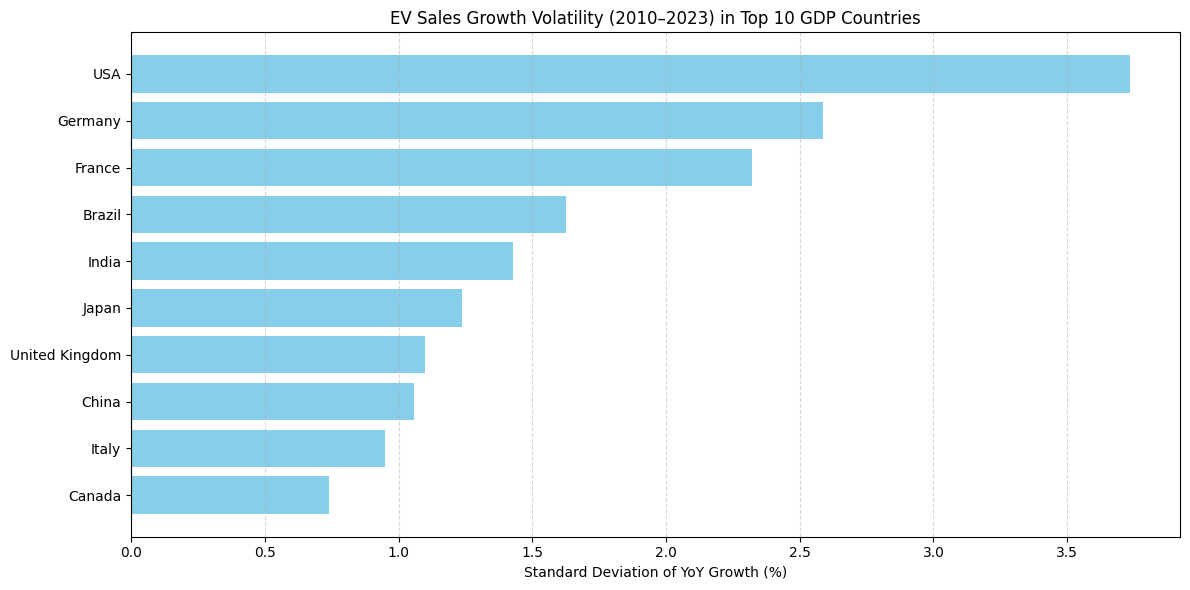

In [10]:
ev_agg['pct_change'] = ev_agg.groupby('region')['ev_sales'].pct_change()

volatility = ev_agg.groupby('region')['pct_change'].std().reset_index()
volatility.columns = ['region', 'volatility']
volatility = volatility.sort_values(by='volatility', ascending=False)

plt.figure(figsize=(12, 6))

volatility_sorted = volatility.sort_values('volatility', ascending=True)

plt.barh(
    volatility_sorted['region'],
    volatility_sorted['volatility'],
    color='skyblue'
)
plt.xlabel('Standard Deviation of YoY Growth (%)')
plt.title('EV Sales Growth Volatility (2010–2023) in Top 10 GDP Countries')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Volatility** in this context refers to the **consistency (or inconsistency)** in a country's year-over-year (YoY) electric vehicle (EV) sales growth. It's measured using the **standard deviation** of the annual percentage change in EV sales from 2010 to 2023.

*   A **higher standard deviation** means the country's EV sales growth has fluctuated more, indicating an **unstable growth pattern.**

*   A **lower standard deviation** suggests that the country has experienced **steadier growth** year to year.

This horizontal bar chart displays the **volatility of EV sales growth** across the **top 10 GDP countries.** Here’s what we can observe:
The United States has the highest volatility, meaning its annual EV growth has

*   The **United States** has the **highest volatility**, meaning its annual EV growth has varied widely — possibly due to shifts in policy, consumer demand, or manufacturer output.

*   **Germany** and **France** also show relatively high volatility, reflecting some inconsistency in how their EV markets have grown over the years.

*   On the other end, **Canada, Italy**, and **China** show the **lowest volatility**, suggesting that their EV markets have grown at a more consistent pace.




In [19]:
from scipy.stats import f_oneway

ev_agg['pct_change'] = ev_agg.groupby('region')['ev_sales'].pct_change()

ev_agg_top10 = ev_agg[ev_agg['region'].isin(top10_gdp)]

anova_groups = [ev_agg_top10[ev_agg_top10['region'] == country]['pct_change'].dropna()
                for country in top10_gdp]

f_stat, p_value = f_oneway(*anova_groups)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 0.3203388713247266
P-value: 0.9669424302874488


The F-statistic is very low, and the corresponding p-value is substantially higher than the common significance threshold (e.g., 0.05). This indicates no statistically significant difference in the mean year-over-year EV sales growth rates among the top 10 GDP countries.

In simpler terms, while the earlier volatility analysis (using standard deviation) showed that some countries have more fluctuating growth patterns than others, the overall average percentage growth rates are statistically similar across these countries over the period from 2010 to 2023.

Thus, although the magnitude of fluctuations (volatility) varies, the ANOVA suggests there is no evidence to conclude that the average YoY growth rates are fundamentally different among these nations.



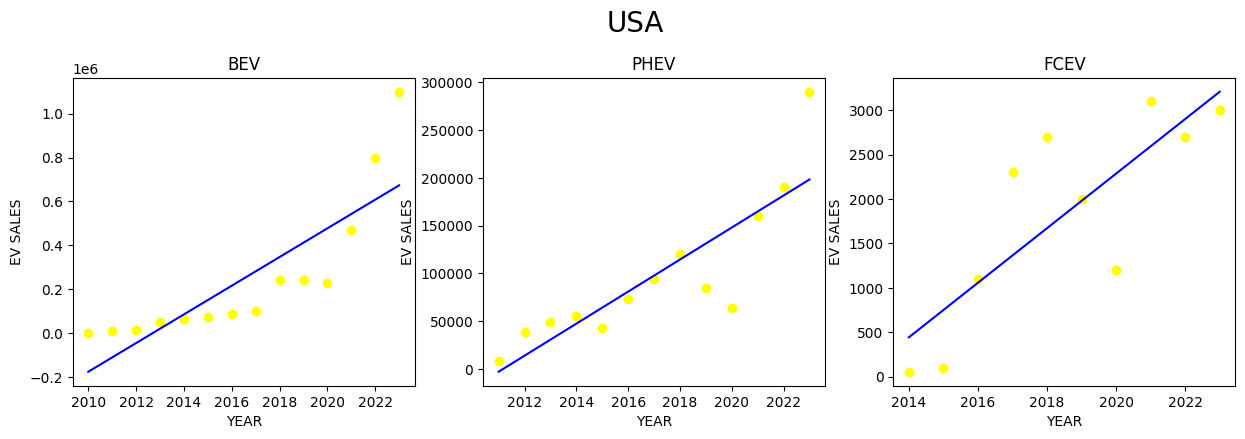

2024 Predictions
BEV: [738608.79120879]
PHEV: [214961.53846154]
FCEV: [3515.66666667]


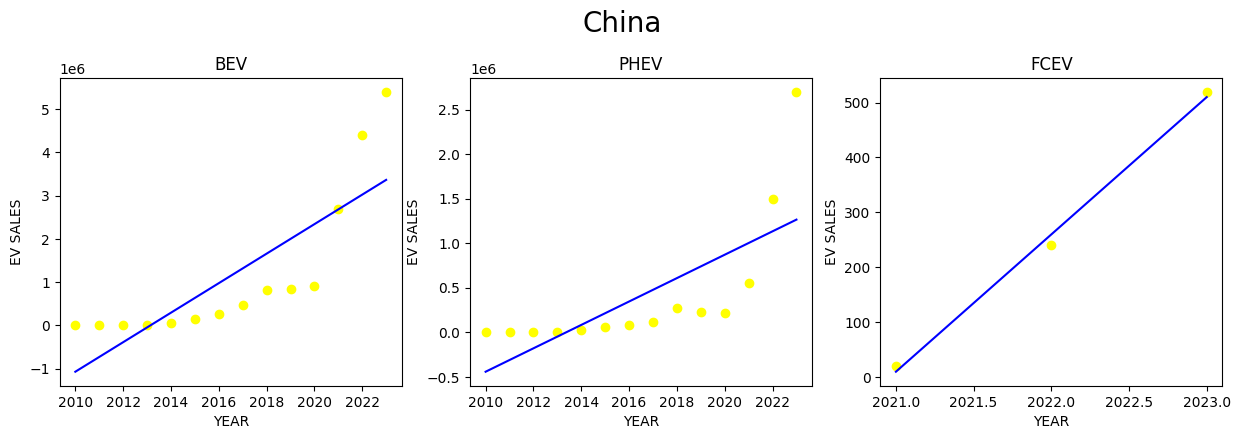

2024 Predictions
BEV: [3703313.18681324]
PHEV: [1395501.53846154]
FCEV: [760.66666667]


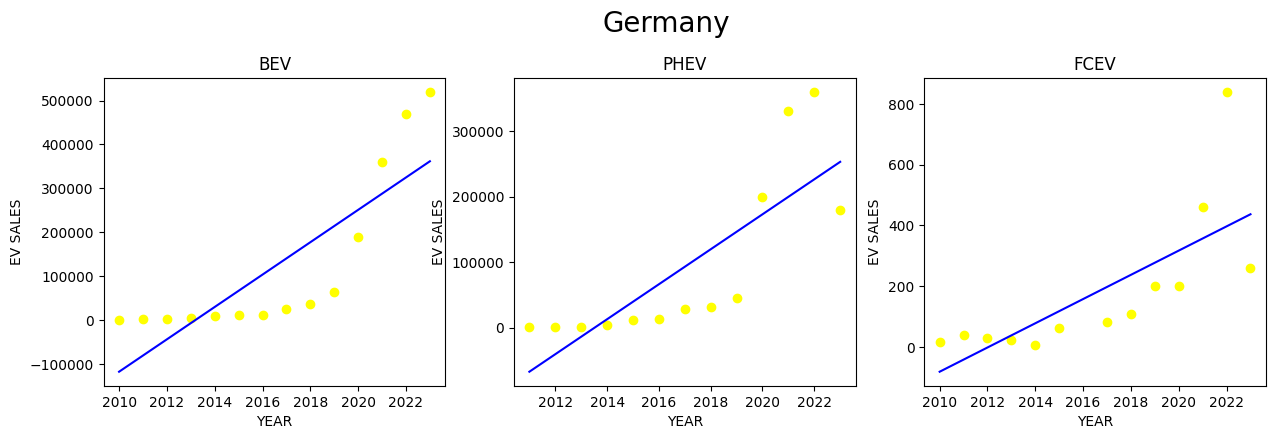

2024 Predictions
BEV: [398416.26373626]
PHEV: [279686.15384615]
FCEV: [476.5873392]


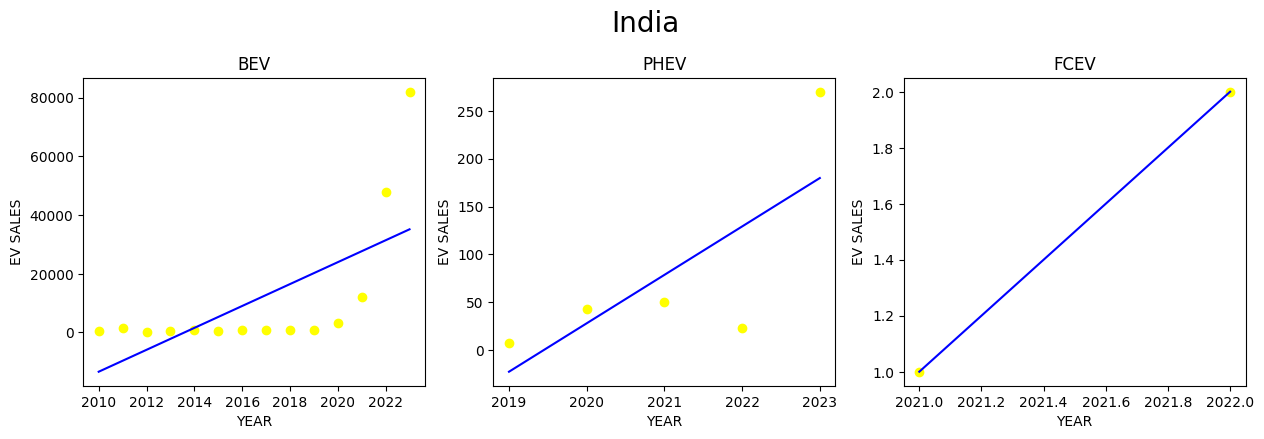

2024 Predictions
BEV: [38861.86813187]
PHEV: [230.4]
FCEV: [4.]


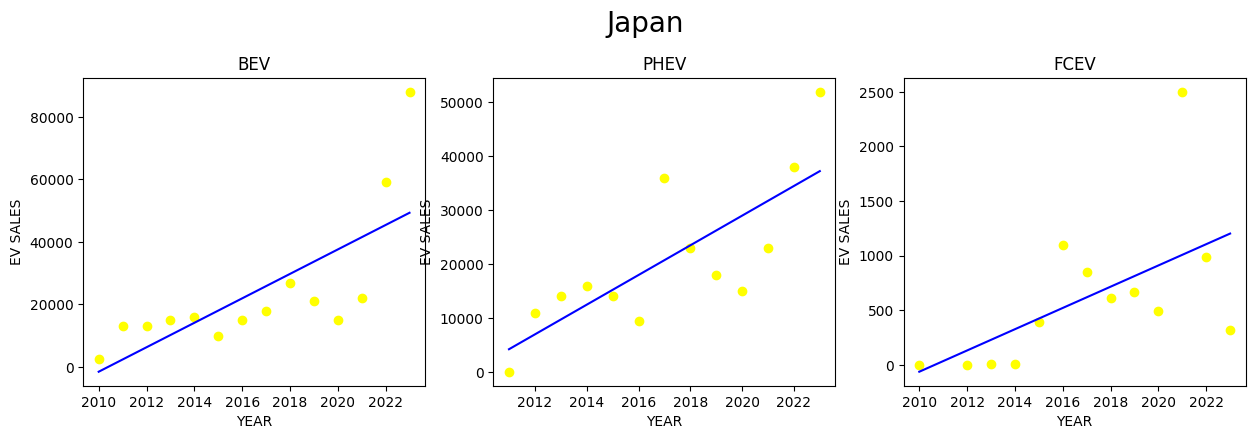

2024 Predictions
BEV: [53206.59340659]
PHEV: [40013.07692308]
FCEV: [1298.83030781]


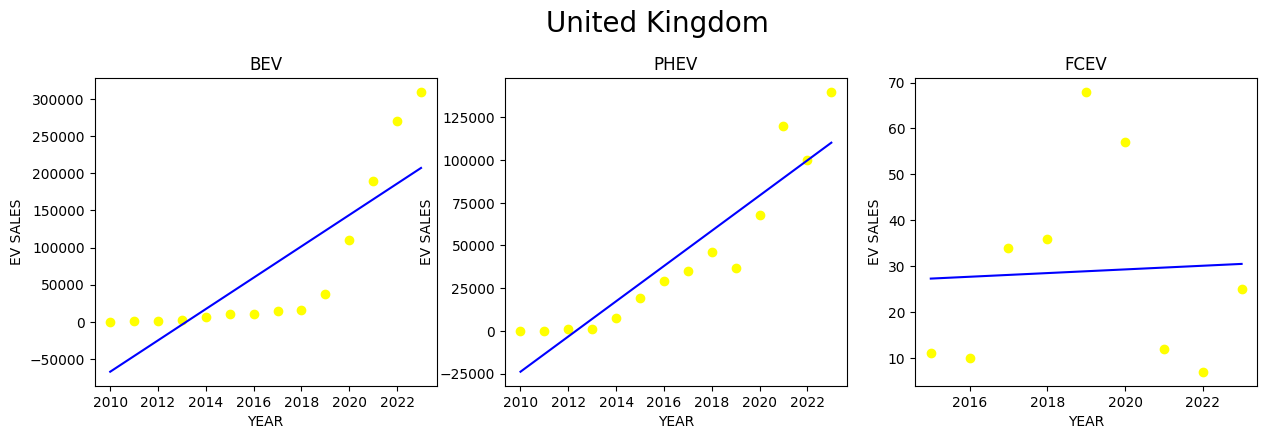

2024 Predictions
BEV: [228423.95604395]
PHEV: [120479.85714286]
FCEV: [30.88888889]


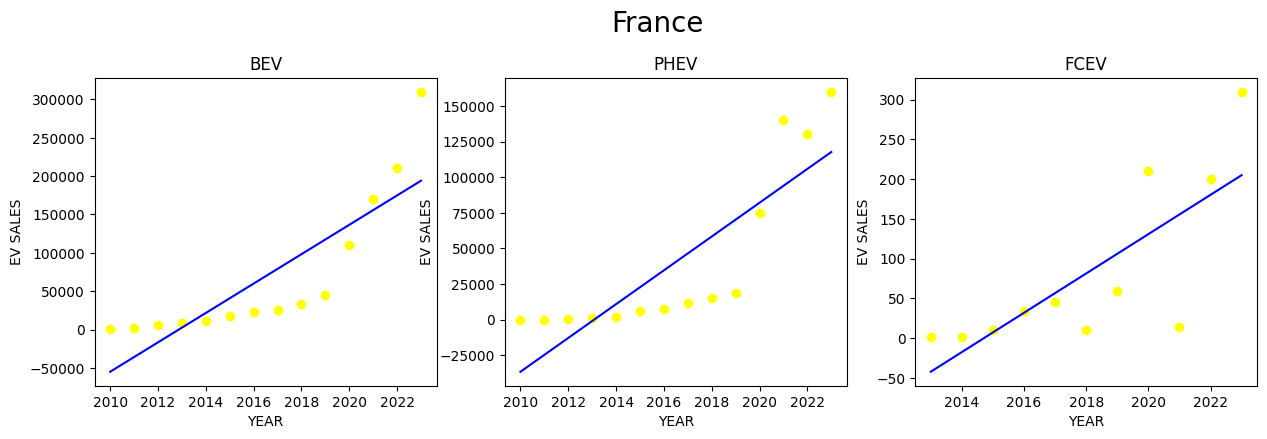

2024 Predictions
BEV: [213154.17582417]
PHEV: [129558.83516483]
FCEV: [229.76363636]


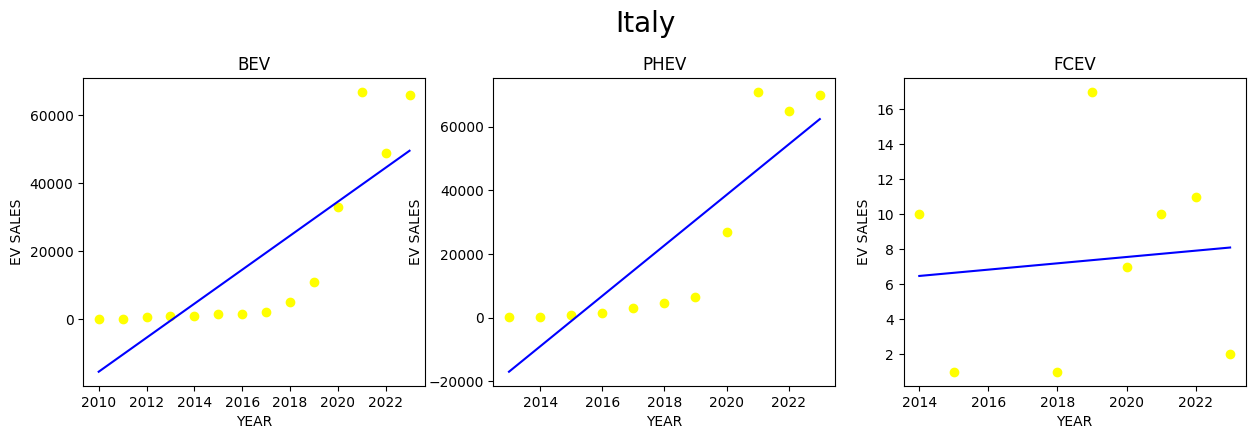

2024 Predictions
BEV: [54612.30769231]
PHEV: [70342.90909091]
FCEV: [8.27777778]


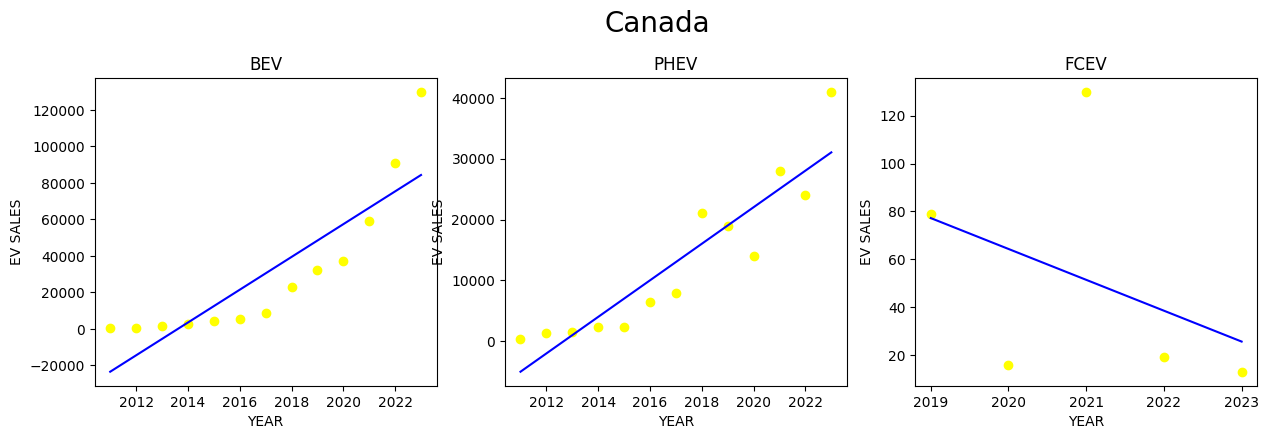

2024 Predictions
BEV: [93340.76923077]
PHEV: [34038.46153846]
FCEV: [12.7]


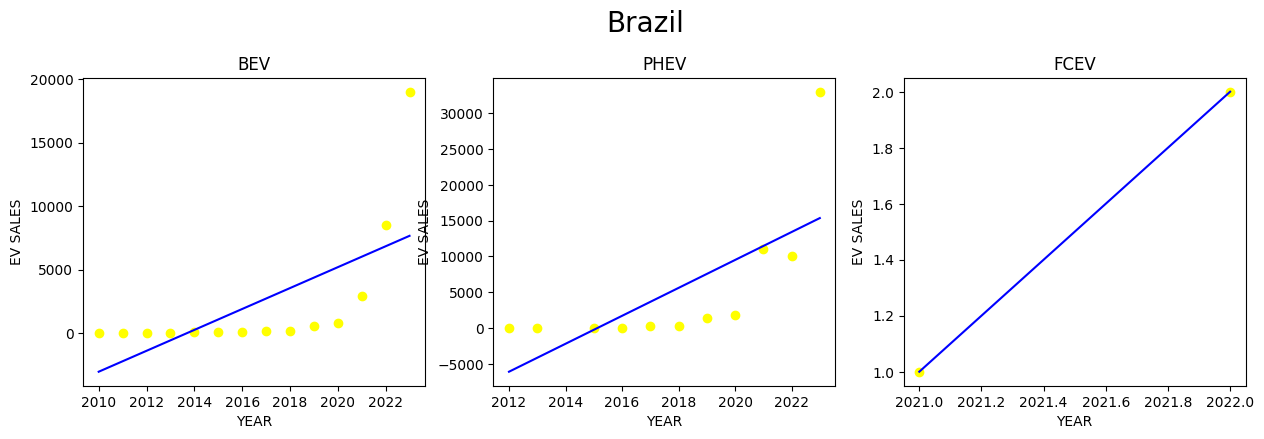

2024 Predictions
BEV: [8482.97802198]
PHEV: [17312.58345021]
FCEV: [4.]


In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


top10_gdp = [
    'USA', 'China', 'Germany', 'India', 'Japan',
    'United Kingdom', 'France', 'Italy', 'Canada', 'Brazil'
]

power_trains = ['BEV', 'PHEV', 'FCEV']
for country in top10_gdp:
  fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns
  fig.suptitle(country, fontsize = 20, y = 1.05)
  predictions_2024 = []
  for i in range(len(power_trains)):
    power = power_trains[i]
    df = sales_df[(sales_df['region']== country) & (sales_df['powertrain']==power)]
    if len(df)==0:
      continue
    x = df[['year']]
    y = df['value']
    model = LinearRegression()
    model.fit(x,y)
    predictions = model.predict(x)
    new_data = pd.DataFrame({'year': [2024]})
    predictions_2024.append(model.predict(new_data))
    axes[i].scatter(x,y,color='yellow')
    axes[i].plot(x, predictions,color= 'blue')
    axes[i].set_title(power)
    axes[i].set_xlabel('YEAR')
    axes[i].set_ylabel('EV SALES')
  plt.show()
  print("2024 Predictions")
  for i in range(3):
    print(power_trains[i] + ": "+str(predictions_2024[i]))





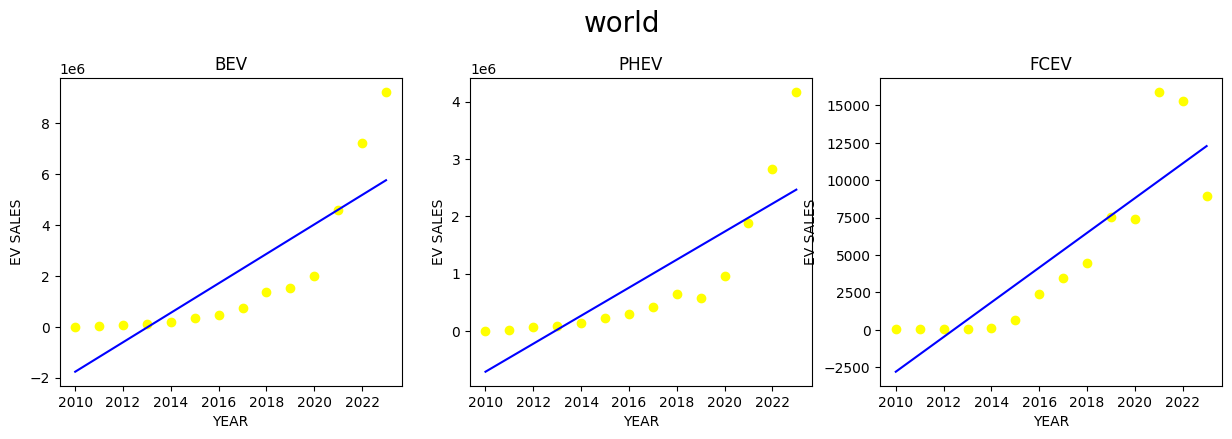

2024 Predictions
BEV: [6333429.01098919]
PHEV: [2708519.59340656]
FCEV: [13447.37142857]


In [36]:
grouped = sales_df.groupby(['year', 'powertrain'])['value'].sum().reset_index()
power_trains = ['BEV', 'PHEV', 'FCEV']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns
fig.suptitle('world', fontsize = 20, y = 1.05)
predictions_2024 = []
for i in range(len(power_trains)):
  power = power_trains[i]
  df = grouped[grouped['powertrain']==power]
  if len(df)==0:
    continue
  x = df[['year']]
  y = df['value']
  model = LinearRegression()
  model.fit(x,y)
  predictions = model.predict(x)
  new_data = pd.DataFrame({'year': [2024]})
  predictions_2024.append(model.predict(new_data))
  axes[i].scatter(x,y,color='yellow')
  axes[i].plot(x, predictions,color= 'blue')
  axes[i].set_title(power)
  axes[i].set_xlabel('YEAR')
  axes[i].set_ylabel('EV SALES')
plt.show()
print("2024 Predictions")
for i in range(3):
  print(power_trains[i] + ": "+str(predictions_2024[i]))



